# GP generation

This file is written to generate $\mathbb R^d$ gaussian random field

In [9]:
import numpy as np
import gpGenerator
import matplotlib.pyplot as plt


## 1D gp generation
example:

In [10]:
x=np.linspace(0,1,100)
dx=x[1]-x[0]
Neig=10 # number of eigenvalues to consider
sigma=1e-3 # controls the roughness of the signal (corolation between adjacent point)
scale=10  # Controls the amplitude of the signal
eigenvalues,eigenvectors,A=gpGenerator.geneigen(x,Neig,sigma,dx)
gp=gpGenerator.gengpprocess(eigenvalues,eigenvectors,Neig,scale)


Text(0, 0.5, 'gp')

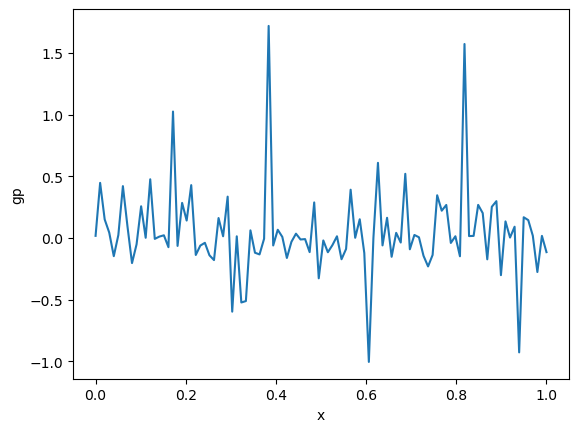

In [11]:
plt.plot(x,gp.T)
plt.xlabel('x')
plt.ylabel('gp')

## 2D gp generation
example:

Text(0, 0.5, 'y')

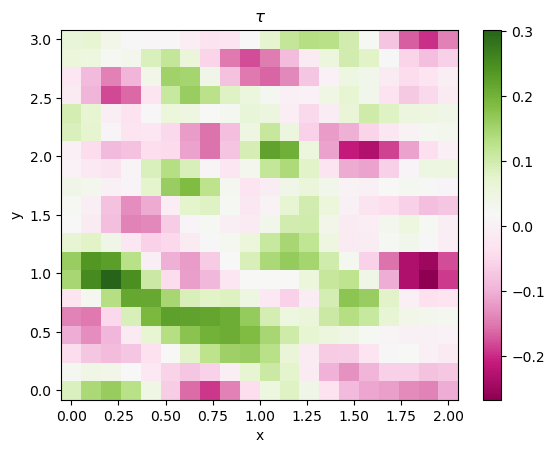

In [13]:
X=np.linspace(0,2,20)
Y=np.linspace(0,3,20)
dX=X[1]-X[0] #dx
dY=Y[1]-Y[0] #dy
dx=dX*dY # Area of any element (dxdy)
Neig=100 # Number of eigenmodes to consider
Nx=np.size(X)
Ny=np.size(Y)
sigma=1e-1 # controls the roughness of the signal (corolation between adjacent point)
scale=1
x=np.zeros((np.size(X)*np.size(Y),2))

for index1 in range(Nx):
    for index2 in range(Ny):
        x[index1+index2*Ny]=np.array([X[index1],Y[index2]]).reshape(1,2) # ordering the points and put them in one arrray called x
eigenvalues,eigenvectors,A=gpGenerator.geneigen(x,Neig,sigma,dx)
g=gpGenerator.gengpprocess(eigenvalues,eigenvectors,Neig,scale)
g=g.reshape(Nx,Ny)
XX, YY = np.meshgrid(X, Y)
#%%
fig, (ax0) = plt.subplots(nrows=1)
cmap = plt.colormaps['PiYG']
im = ax0.pcolormesh(XX, YY, g, cmap=cmap)
fig.colorbar(im, ax=ax0)
ax0.set_title(r'$\tau$')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

### Increase sigma to get more smooth noise